<a href="https://colab.research.google.com/github/Neha202801/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Dataset**



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [4]:
df=pd.read_csv("/content/archive.zip")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Checking the data**

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This dataset contains the information abt home characterstics of UK. :
* id - Unique ID for each home sold
*date - Date of the home sale

* price - Price of each home sold

* bedrooms - Number of bedrooms

* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

* sqft_living - Square footage of the apartments interior living space

* sqft_lot - Square footage of the land space

* floors - Number of floors

* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

* view - An index from 0 to 4 of how good the view of the property was

* condition - An index from 1 to 5 on the condition of the apartment,

* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

* sqft_above - The square footage of the interior housing space that is above ground level

* sqft_basement - The square footage of the interior housing space that is below ground level

* yr_built - The year the house was initially built

* yr_renovated - The year of the house’s last renovation

* zipcode - What zipcode area the house is in

* lat - Lattitude

* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [6]:
type((df))

pandas.core.frame.DataFrame

In [7]:
df.shape

(21613, 21)

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [16]:
df['price'].min()

75000.0

In [17]:
df['price'].max()

7700000.0

# **Data Preprocessing**

In [27]:
df = df.drop(["id"],axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* The 'id' column is meaningless for this problem so, I dropped it.

In [28]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop("date",axis=1)


* The 'date' column is non-numeric, but I don't want to drop it so I split it into 3 parts, 'day', 'month' and 'year'.

<ipython-input-29-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

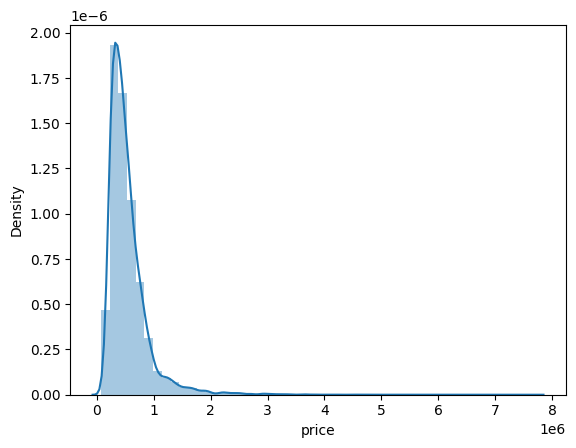

In [29]:
sns.distplot(df['price'])

* It looks like a Normal Distribution, but on the right there is some data that distorts the distribution.
*So , I'll drop  1% of the total data.

In [30]:
len(df)*0.01

216.13

In [31]:
df = df.sort_values(['price'], ascending=False).iloc[216:]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
3281,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,...,1951,0,98004,47.6203,-122.212,2370,13320,2015,2,26
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,...,1998,0,98005,47.6422,-122.157,3900,35237,2015,4,22
12283,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,...,1988,0,98040,47.5632,-122.215,3700,14486,2014,10,15
1152,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,...,1963,0,98034,47.7165,-122.259,2630,13868,2015,4,21
9175,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,...,1960,0,98040,47.5287,-122.220,3730,16560,2015,2,13


<ipython-input-32-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

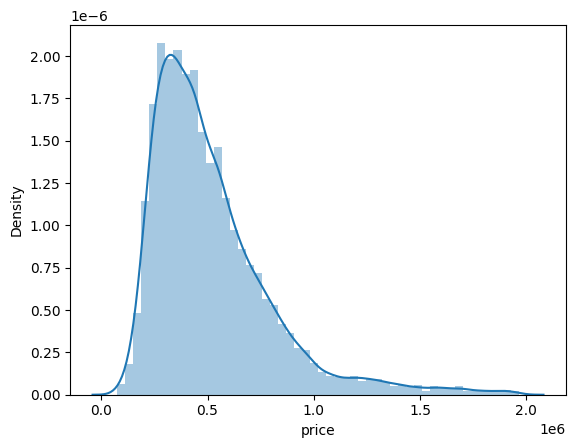

In [32]:
sns.distplot(df['price'])

* Hence , by removing the data which were adversely affecting the data ,we got more perfect ' Normal Distribution'

# **Exploratory Data Analysis**

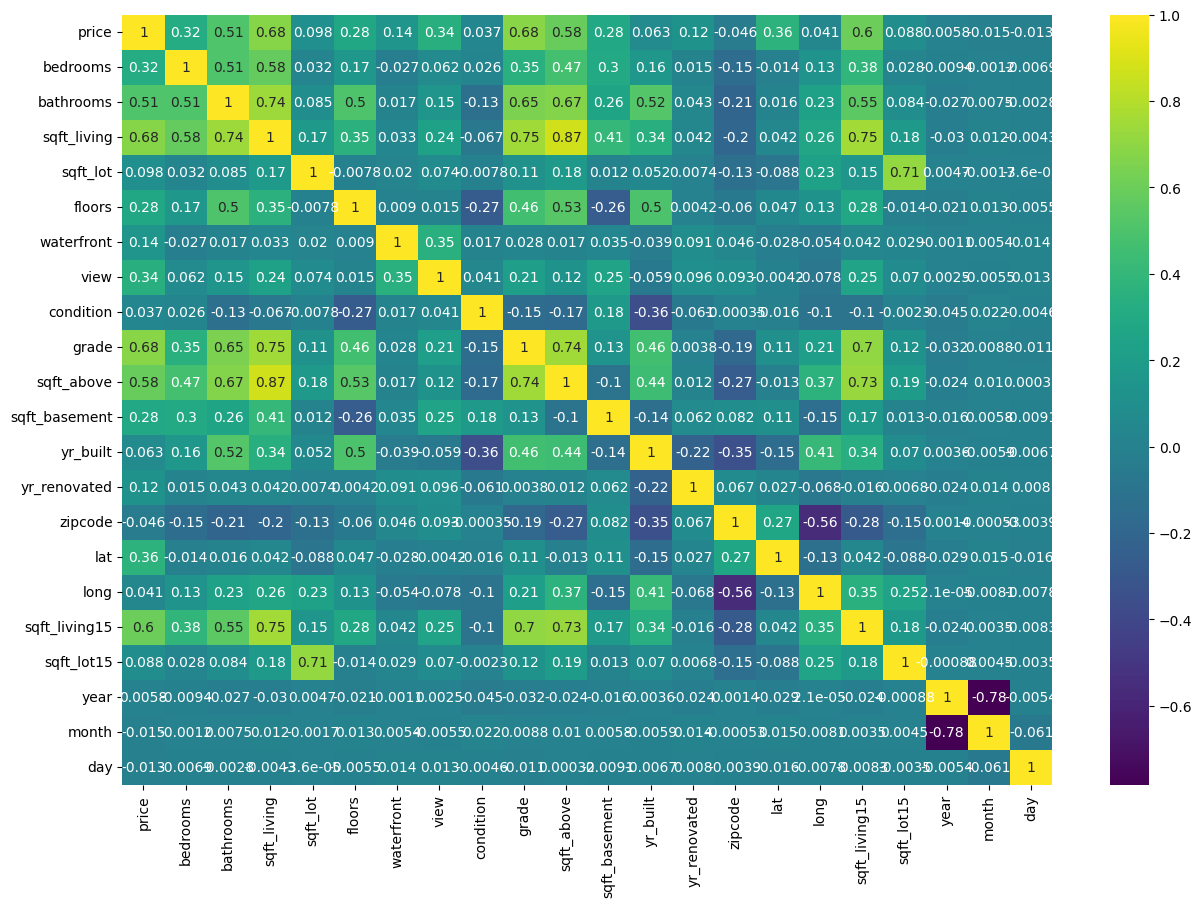

In [59]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap="viridis")
plt.show()

In [24]:
df.corr()['price'].sort_values()

<ipython-input-24-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

* sqft_living , grade , sqft_above seems to be more related with the target variable (price)

<Axes: xlabel='sqft_living', ylabel='price'>

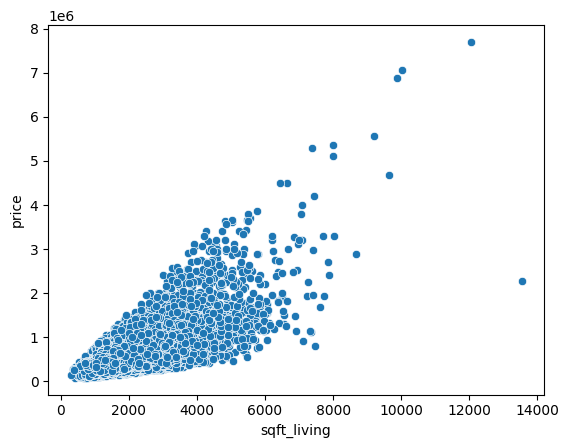

In [25]:
sns.scatterplot(x='sqft_living', y='price', data=df)

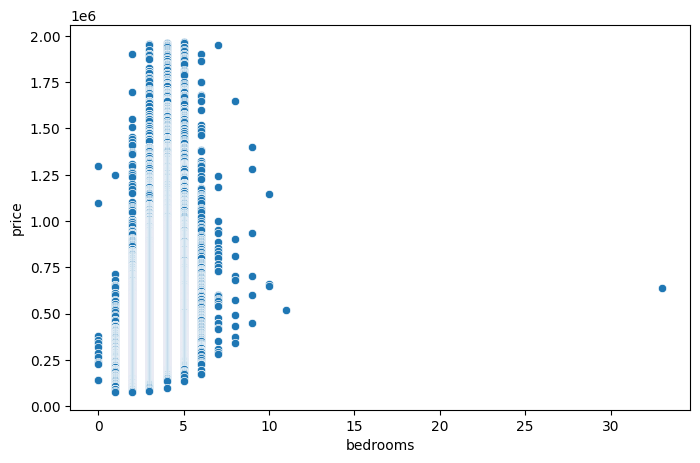

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.show()

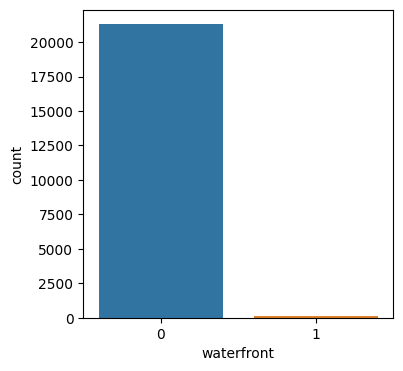

In [63]:
plt.figure(figsize=(4, 4))
sns.countplot(x='waterfront', data=df)
plt.show()

# **Creating Models**

## *1.Linear Regreesion*

In [33]:
# Creating X and Y (features and labels)
x = df.iloc[:,1:]
y = df.iloc[:,0:1]
X = x.values
Y = y.values

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print(f'R² score: {r2_score(Y, lin_reg.predict(X))*100}')

R² score: 71.6628940100554


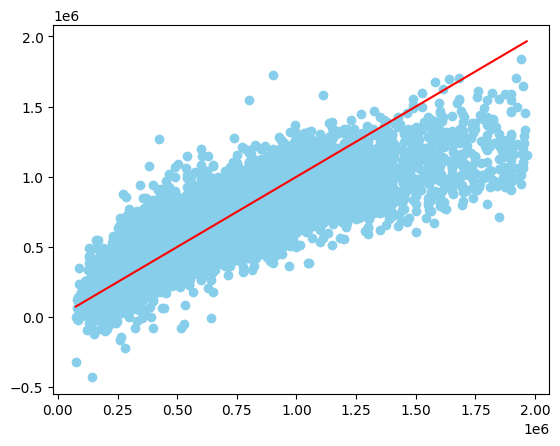

In [46]:
#Linear - Regression Graph
predictArray_lin = lin_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="skyblue")
plt.plot(Y,Y, color="r")

## *2. Polynomial Regreession*

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


print(f'R² score: {r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100}')

R² score: 84.40203076492094


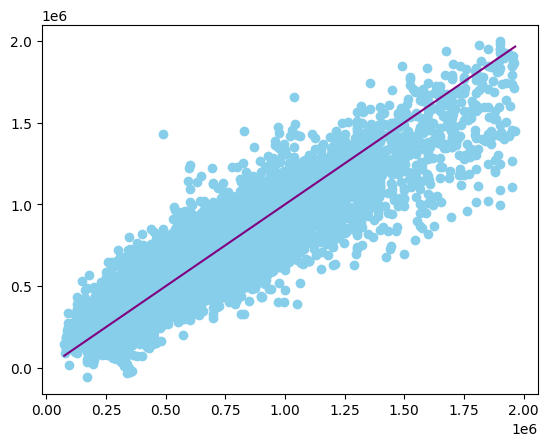

In [49]:
# Polynomial - Regression Graph
predictArray_poly = lin_reg2.predict(poly_reg.fit_transform(X))
plt.scatter(Y,predictArray_poly, color="skyblue")
plt.plot(Y,Y, color="purple")

## 3. *Random Forest Regressor*

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(f'R² score: {r2_score(Y, rf_reg.predict(X))*100}')

R² score: 97.46836948843632


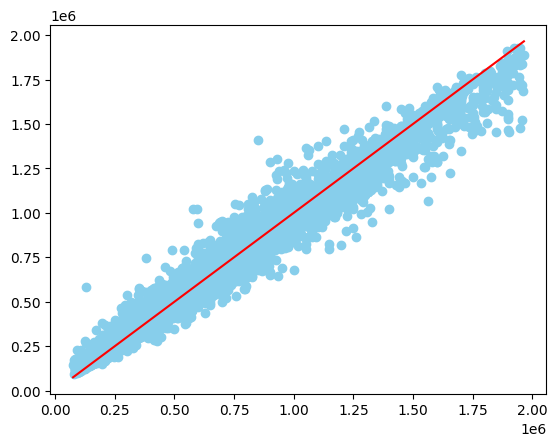

In [52]:
#Random Forest - Regression Graph
predictArray_rf = rf_reg.predict(X)
plt.scatter(Y,predictArray_rf, color="skyblue")
plt.plot(Y,Y, color="red")

# **Conclusion**

In [53]:
#Creation of R² scores
r2_lin = r2_score(Y, lin_reg.predict(X))*100
r2_poly = r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)))*100
r2_rf = r2_score(Y, rf_reg.predict(X))*100

In [54]:
#Printing R² scores
print("R² SCORES OF MODELS\n")
print(f'Linear Regression R² Score     : {r2_lin}')
print(f'Polynomial Regression R² Score : {r2_poly}')
print(f'Random Forest R² Score         : {r2_rf}')

R² SCORES OF MODELS

Linear Regression R² Score     : 71.6628940100554
Polynomial Regression R² Score : 84.40203076492094
Random Forest R² Score         : 97.46836948843632


# **Insights**

* **The most successful model for regression of this dataset is 'Random Forest' having R2 score of 97.47.**
* **The variable that affects the price the most is 'sqft_living' with +0.70 correlation value.**